# Sowing Success: How Machine Learning Helps Farmers Select the Best Crops

![Farmer in a field](farmer_in_a_field.jpg)

Measuring essential soil metrics such as nitrogen, phosphorous, potassium levels, and pH value is an important aspect of assessing soil condition. However, it can be an expensive and time-consuming process, which can cause farmers to prioritize which metrics to measure based on their budget constraints.

Farmers have various options when it comes to deciding which crop to plant each season. Their primary objective is to maximize the yield of their crops, taking into account different factors. One crucial factor that affects crop growth is the condition of the soil in the field, which can be assessed by measuring basic elements such as nitrogen and potassium levels. Each crop has an ideal soil condition that ensures optimal growth and maximum yield.

A farmer reached out to you as a machine learning expert for assistance in selecting the best crop for his field. They've provided you with a dataset called `soil_measures.csv`, which contains:

- `"N"`: Nitrogen content ratio in the soil
- `"P"`: Phosphorous content ratio in the soil
- `"K"`: Potassium content ratio in the soil
- `"pH"` value of the soil
- `"crop"`: categorical values that contain various crops (target variable).

Each row in this dataset represents various measures of the soil in a particular field. Based on these measurements, the crop specified in the `"crop"` column is the optimal choice for that field.  

In this project, you will build multi-class classification models to predict the type of `"crop"` and identify the single most importance feature for predictive performance.

In [1]:
# All required libraries are imported here for you.
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Load the dataset
crops = pd.read_csv("soil_measures.csv")

# Write your code here

c:\Users\zoona\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\__init__.py:169: UserWarning: A NumPy version >=1.18.5 and <1.26.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


    N   P   K        ph  crop
0  90  42  43  6.502985  rice
1  85  58  41  7.038096  rice
2  60  55  44  7.840207  rice
3  74  35  40  6.980401  rice
4  78  42  42  7.628473  rice
                 N            P            K           ph
count  2200.000000  2200.000000  2200.000000  2200.000000
mean     50.551818    53.362727    48.149091     6.469480
std      36.917334    32.985883    50.647931     0.773938
min       0.000000     5.000000     5.000000     3.504752
25%      21.000000    28.000000    20.000000     5.971693
50%      37.000000    51.000000    32.000000     6.425045
75%      84.250000    68.000000    49.000000     6.923643
max     140.000000   145.000000   205.000000     9.935091
N       0
P       0
K       0
ph      0
crop    0
dtype: int64


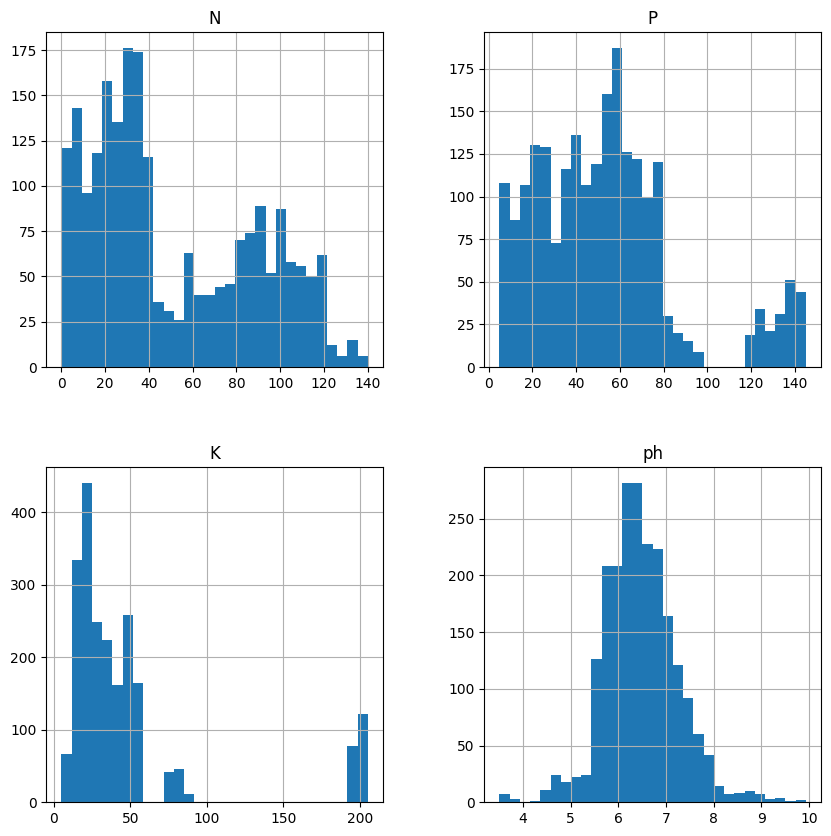

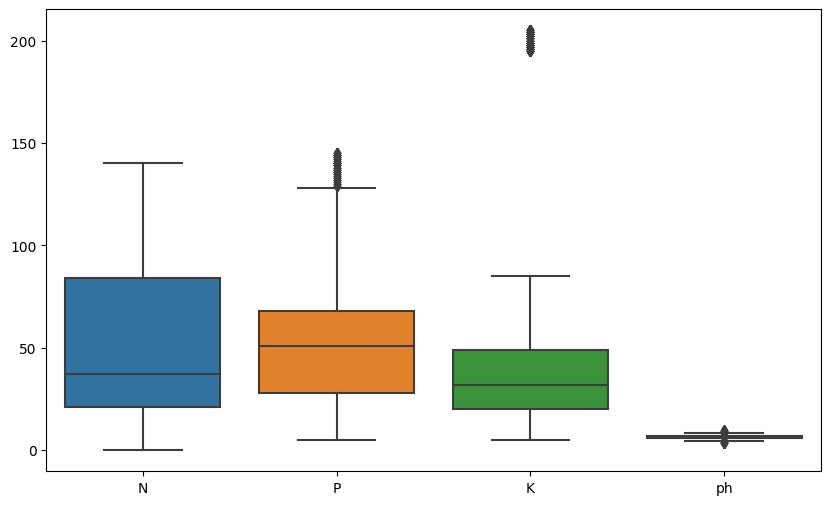

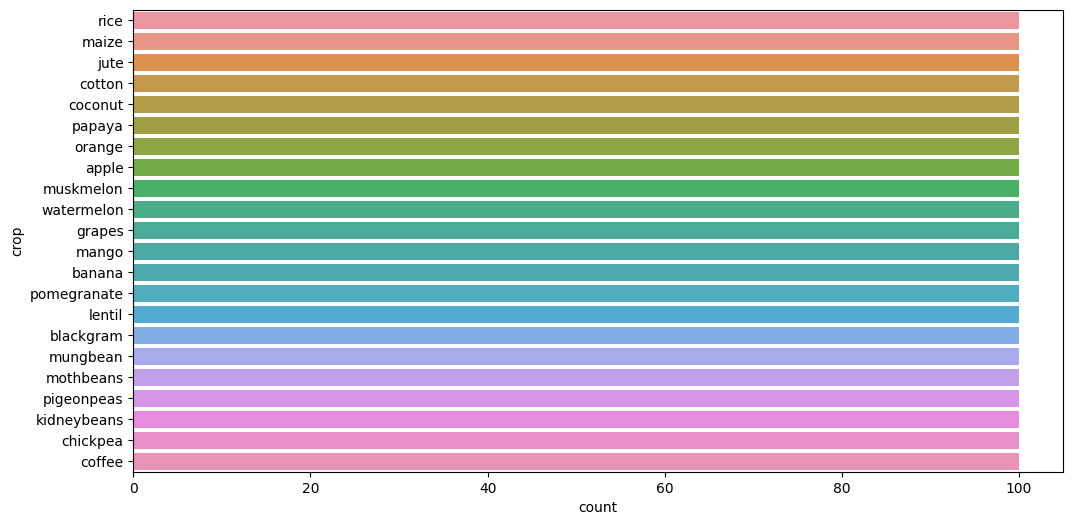

In [2]:
import seaborn as sns

# Display the first few rows of the dataframe
print(crops.head())

# Display basic statistics
print(crops.describe())

# Check for missing values
print(crops.isnull().sum())

# Visualize the distribution of each feature
import matplotlib.pyplot as plt

# Histograms for numerical features
crops.hist(bins=30, figsize=(10, 10))
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(10, 6))
sns.boxplot(data=crops[['N', 'P', 'K', 'ph']])
plt.show()

# Count plot for the target variable 'crop'
plt.figure(figsize=(12, 6))
sns.countplot(y='crop', data=crops, order=crops['crop'].value_counts().index)
plt.show()

In [6]:
# print(crops.info())

print(crops['crop'].value_counts())

print(crops['crop'].value_counts(normalize=True))

print(crops['crop'].unique())

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: crop, dtype: int64
rice           0.045455
maize          0.045455
jute           0.045455
cotton         0.045455
coconut        0.045455
papaya         0.045455
orange         0.045455
apple          0.045455
muskmelon      0.045455
watermelon     0.045455
grapes         0.045455
mango          0.045455
banana         0.045455
pomegranate    0.045455
lentil         0.045455
blackgram      0.045455
mungbean       0.045455
mothbeans      0.045455
pigeonpeas     0.045455
kidneybeans    0.045455
chickpea       0.045455
coffee         0.045455
Name: crop, dtype: float64
['

In [7]:
# split the data into features and target variable
X = crops.drop('crop', axis=1)
y = crops['crop']

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# dictionary to store the accuracy of each model
accuracy = {}

# loop through features and train a model for each feature
for feature in X.columns:
    # create a new dataframe with the feature
    X_train_feature = X_train[[feature]]
    X_test_feature = X_test[[feature]]

    # create a logistic regression model
    model = LogisticRegression(max_iter=1000, multi_class='multinomial')

    # train the model
    model.fit(X_train_feature, y_train)

    # make predictions
    y_pred = model.predict(X_test_feature)

    # calculate the accuracy
    acc = metrics.accuracy_score(y_test, y_pred)
    accuracy[feature] = acc

In [11]:
# print the accuracy of each model
print(accuracy)


{'N': 0.1431818181818182, 'P': 0.18863636363636363, 'K': 0.2590909090909091, 'ph': 0.09772727272727273}


In [12]:
# best feature and score as k-v pair in a dictionary
best_feature = max(accuracy, key=accuracy.get)
best_score = accuracy[best_feature]
best_model = {best_feature: best_score}

# print the best feature and score
print(best_model)



{'K': 0.2590909090909091}
